In [1]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from PIL import Image

from pathlib import Path

Files already downloaded and verified


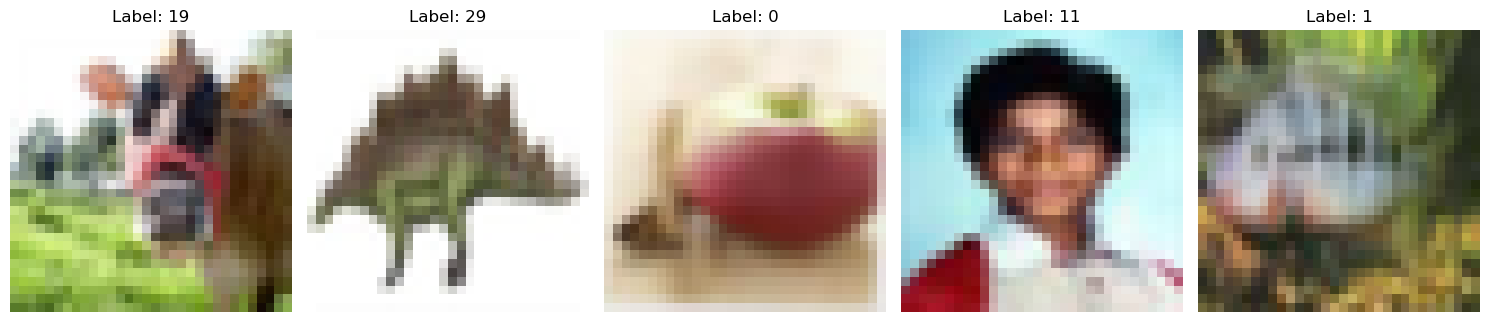

In [2]:
# Define transformation for displaying images (No normalization)
transform = transforms.Compose([
    transforms.ToTensor()
])

datadir = Path().home() / "dataset"

# Download the CIFAR-10 dataset
dataset = datasets.CIFAR100(root=datadir, train=True, download=True, transform=transform)

# Define a function to display images
def show_images(dataset, num_images=5):
    """Display a few images from the dataset."""
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img, label = dataset[i]
        img = img.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Label: {label}")
    plt.tight_layout()
    plt.show()

# Display 5 images
show_images(dataset, num_images=5)

In [16]:
np.unique(dataset.targets)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

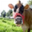

In [3]:
img_pil = Image.fromarray(dataset.data[0])
img_pil

In [4]:
def pad(x, border=4):
    return np.pad(x, [(0, 0), (border, border), (border, border)], mode='reflect')

class RandomPadandCrop(object):
    """Crop randomly the image.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, x):
        """
        x = pad(x, 4)
        """

        # print(x.shape)
        
        print('pad...')
        x = pad(x, 4)
        print(x.shape)
        

        h, w = x.shape[1:]
        new_h, new_w = self.output_size

        print('h, w: ', h, w)
        print('new_h, new_w: ', new_h, new_w)

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        print('top, left: ', top, left)

        x = x[:, top: top + new_h, left: left + new_w]

In [5]:
img, label = dataset[0]

In [6]:
img.shape

torch.Size([3, 32, 32])

In [7]:
pad(img).shape

(3, 40, 40)

In [8]:
random_padand_crop = RandomPadandCrop(32)

In [9]:
random_padand_crop(img)

pad...
(3, 40, 40)
h, w:  40 40
new_h, new_w:  32 32
top, left:  1 7


In [10]:
cifar10_mean = (0.4914, 0.4822, 0.4465) # equals np.mean(train_set.train_data, axis=(0,1,2))/255
cifar10_std = (0.2471, 0.2435, 0.2616) # equals np.std(train_set.train_data, axis=(0,1,2))/255


transform_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    RandomPadandCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=cifar10_mean, std=cifar10_std)
])

transform_train_v2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=cifar10_mean, std=cifar10_std)
])

In [11]:
transform_train_v2(img).shape

torch.Size([3, 224, 224])

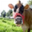

In [12]:
a = transforms.ToPILImage()(img)
a

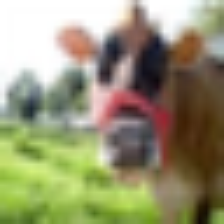

In [13]:
b = transforms.Resize((224, 224))(a)
b

In [14]:
np.array(b).shape

(224, 224, 3)

In [17]:
def train_val_split(labels, n_labeled_per_class):
    labels = np.array(labels)
    train_labeled_idxs = []
    train_unlabeled_idxs = []
    val_idxs = []

    for i in range(100):
        idxs = np.where(labels == i)[0]
        np.random.shuffle(idxs)
        train_labeled_idxs.extend(idxs[:n_labeled_per_class])
        train_unlabeled_idxs.extend(idxs[n_labeled_per_class:-500])
        val_idxs.extend(idxs[-500:])
    np.random.shuffle(train_labeled_idxs)
    np.random.shuffle(train_unlabeled_idxs)
    np.random.shuffle(val_idxs)

    return train_labeled_idxs, train_unlabeled_idxs, val_idxs

In [19]:
train_labeled_set, train_unlabeled_set, val_set, test_set = train_val_split(dataset.targets, 100)

ValueError: not enough values to unpack (expected 4, got 3)

In [31]:
labels = np.array(dataset.targets)
labels

array([19, 29,  0, ...,  3,  7, 73])

In [32]:
idxs_for_19 = np.where(labels == 19)[0]
idxs_for_19

array([    0,   137,   180,   224,   278,   351,   430,   529,   683,
         686,   762,   818,   870,  1052,  1156,  1177,  1279,  1336,
        1470,  1821,  1850,  1947,  2208,  2370,  2409,  2454,  2697,
        2767,  3046,  3203,  3255,  3386,  3416,  3607,  3611,  3706,
        3718,  3840,  4038,  4074,  4136,  4141,  4283,  4289,  4356,
        4403,  4583,  4592,  4639,  4876,  4919,  4993,  5383,  5397,
        5494,  5540,  5750,  5783,  5824,  5833,  5920,  5922,  5946,
        5979,  6075,  6238,  6286,  6348,  6453,  6556,  6658,  7009,
        7128,  7293,  7298,  7384,  7574,  7689,  7692,  7698,  7706,
        7709,  7821,  8097,  8252,  8360,  8428,  8647,  8687,  8789,
        8902,  8924,  8975,  9027,  9205,  9220,  9224,  9251,  9405,
        9420,  9423,  9482,  9502,  9561,  9590,  9612,  9618,  9878,
        9986, 10090, 10093, 10097, 10285, 10360, 10508, 10570, 10705,
       11019, 11148, 11214, 11241, 11668, 11765, 12118, 12215, 12342,
       12376, 12460,

In [35]:
len(idxs_for_19)

500

In [34]:
np.random.shuffle(idxs_for_19)
idxs_for_19

array([ 8902, 23183, 45169, 29784, 20440, 15104, 49628, 12118, 22255,
        6348, 48276, 40063, 21815, 31415,  8428, 10508, 35127, 14565,
       35758, 37885,   683, 36875, 25925, 26823, 20286, 16807,  5824,
       29661,  6286, 36660, 45315, 24350, 12460, 13498, 43817, 25588,
        2409, 22978, 21778, 39609, 43379,  3611, 37204, 28223, 19593,
       18084, 32912, 19683, 23189, 19519,  9590, 37140,  8360,  4136,
        5383, 32637,  9220, 38243, 32144,  7689, 44324, 32427, 22153,
       21425, 32182, 15250, 11765,  9027, 22653,  4283, 35558, 35765,
       44742, 18660, 46563, 18686, 40480, 32015,   818, 39936, 41450,
       30947, 10285, 20121, 20607, 33564,  2370, 34736, 18457, 15855,
       39559, 35982, 23346, 31384,   529, 26277, 29433, 30729, 46229,
       21184, 20005,  1177, 41243, 15847, 18443, 37100, 30909, 39578,
       14583, 29357, 38640,  9878, 42395, 36499,   278, 27095, 25953,
        7384, 44640, 42867, 31183, 13586, 38956, 15918, 34017, 33181,
       26037, 44040,

In [36]:
n_labeled = 10000

In [41]:
n_labeled_per_class = int(n_labeled/100)
n_labeled_per_class

100

In [42]:
train_labeled_idxs = []
train_unlabeled_idxs = []
val_idxs = []

In [48]:
train_labeled_idxs = idxs_for_19[:n_labeled_per_class]
len(train_labeled_idxs)

100

In [ ]:

train_unlabeled_idxs.extend(idxs_for_19[n_labeled_per_class:-500])
val_idxs.extend(idxs[-500:])